In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from scipy import stats
%matplotlib inline
import matplotlib
matplotlib .rcParams["figure.figsize"]=(20,10)

In [2]:
# Reading the CSV file and skipping bad lines
df = pd.read_csv("aug31.csv")  # Adjust 'sep' if a different delimiter is used

# Display the first few rows
df.head()


,YEAR,DOY,RH2M,T2M
0,1985,1,49.56,19.18
1,1985,2,65.06,18.37
2,1985,3,61.88,19.28
3,1985,4,59.75,19.23
4,1985,5,58.88,18.62


In [44]:
def plot_scatter_chart(df1, YEAR, RH2M):
    # Filter data for even values of GWETTOP and multiples of 3 in the given YEAR
    RH2M2 = df[(df.YEAR == YEAR) & (df.RH2M % 2 == 0)]
    RH2M3 = df[(df.YEAR == YEAR) & (df.RH2M % 3 == 0)]

    # Assuming DOY (Day of Year) is a column in the dataframe
    even_days = RH2M2['DOY'] % 2 == 0
    multiple_of_three_days = RH2M3['DOY'] % 3 == 0

    # Set figure size
    matplotlib.rcParams['figure.figsize'] = (15, 10)

    # Plot scatter plot for even days
    plt.scatter(RH2M2.DOY[even_days], RH2M2.T2M[even_days], color='blue', label='Even Days', s=50)

    # Plot scatter plot for days that are multiples of 3
    plt.scatter(RH2M3.DOY[multiple_of_three_days], RH2M3.T2M[multiple_of_three_days], marker='+', color='green', label='Multiple of Three Days', s=50)

    plt.xlabel('Day of Year (DOY)')
    plt.ylabel('RH2M')
    plt.title(f'Scatter Plot of RH2M vs DOY for Year {YEAR}')
    plt.legend()
    plt.grid(True)
    plt.show()


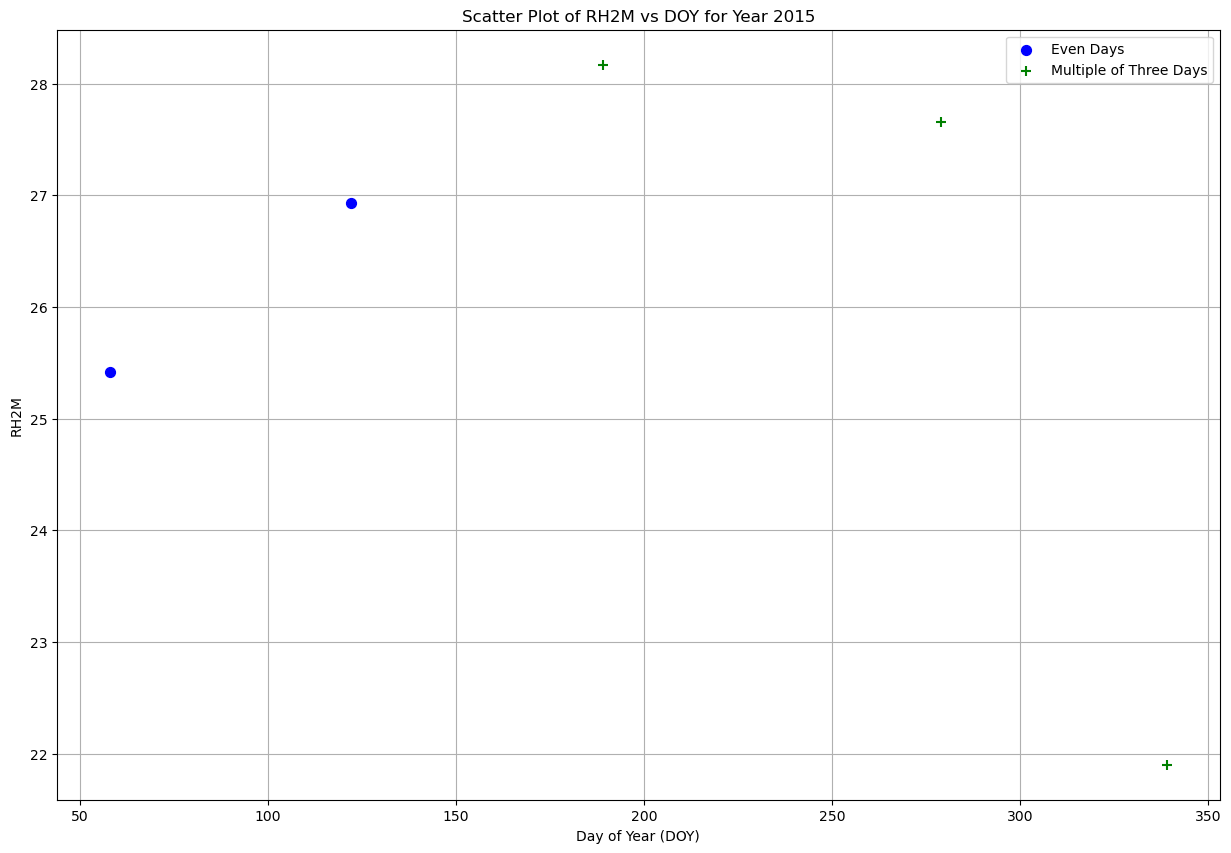

In [45]:
plot_scatter_chart(df, 2015, 'RH2M') 

In [46]:
reg = linear_model.LinearRegression()
reg.fit(df[['YEAR','DOY','RH2M']], df.T2M)

LinearRegression()

In [47]:
reg.coef_

array([-0.22502279, -0.04444944,  0.57413084])

In [48]:
# Outlier removal using Z-score[using Standard deviation techniques to sort out the data which has variation from  mean/median]
df_no_outliers = df[(np.abs(stats.zscore(df[['YEAR', 'DOY', 'RH2M', 'T2M']])) < 3).all(axis=1)]

# Defining the independent variables (X) and the dependent variable (y)
X = df_no_outliers[['YEAR', 'DOY', 'RH2M']]
y = df_no_outliers['T2M']

# Adding polynomial features to capture non-linear relationships
#
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Ridge regression with cross-validation
ridge_reg = Ridge(alpha=1)  # You can adjust 'alpha' based on performance
ridge_reg.fit(X_scaled, y)

# Cross-validation to evaluate the model
cv_scores = cross_val_score(ridge_reg, X_scaled, y, cv=10)  # 10-fold cross-validation

# Print the average R-squared from cross-validation
print(f"Average R-squared from cross-validation: {np.mean(cv_scores)}")

# Fit the model on the entire dataset and show the R-squared score
ridge_accuracy = ridge_reg.score(X_scaled, y)
print(f"R-squared value with Ridge Regression after enhancements: {ridge_accuracy}")


Average R-squared from cross-validation: 0.8734703204930148
R-squared value with Ridge Regression after enhancements: 0.8757681376611062


In [35]:
reg.predict([[2024,273,89.62]])

D:\Anaconda\Conda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.54468739])

In [49]:
def predict_next_30_days(df, start_doy, rh2m_value, year=2024):
   

    future_doy = np.arange(start_doy, start_doy + 30)

    future_data = pd.DataFrame({
        'YEAR': year,
        'DOY': future_doy,
        'RH2M': rh2m_value
    })

    # Transform the future data with polynomial features and scale them
    future_data_poly = poly.transform(future_data)
    future_data_scaled = scaler.transform(future_data_poly)

    # Predict the T2M values for the next 30 days
    future_predictions = ridge_reg.predict(future_data_scaled)

    # Create a DataFrame for the predictions
    predictions_df = pd.DataFrame({
        'Day of Year (DOY)': future_doy,
        'Predicted T2M': future_predictions
    })

    return predictions_df


In [50]:
predictions_df = predict_next_30_days(df, 245, 88.25)
print(predictions_df)

    Day of Year (DOY)  Predicted T2M
0                 245      28.031169
1                 246      27.984563
2                 247      27.937053
3                 248      27.888639
4                 249      27.839321
5                 250      27.789100
6                 251      27.737974
7                 252      27.685946
8                 253      27.633013
9                 254      27.579176
10                255      27.524436
11                256      27.468792
12                257      27.412244
13                258      27.354793
14                259      27.296438
15                260      27.237179
16                261      27.177016
17                262      27.115949
18                263      27.053979
19                264      26.991105
20                265      26.927327
21                266      26.862645
22                267      26.797060
23                268      26.730571
24                269      26.663178
25                270      26.594881
2